# The Grammar of Graphics
v.ekc

We used base plotting tools, then learned Matplotlib. Within Matplotlib we used normal plotting and then brought in object orientated plotting to get even neater code! Now we have **plotnine** which is even neater! **Plotnine** uses the *Grammar of Graphics* which is used with R's beloved `ggplot2` package.

The big idea: instead of telling Python *how* to draw a plot step-by-step, you describe *what* you want — and the grammar handles the rest.

---

## The 7 Layers of the Grammar

| # | Layer | What it does | plotnine keyword |
|---|---|---|---|
| 1 | **Data** | The DataFrame you're plotting | `ggplot(df, ...)` |
| 2 | **Aesthetics** | Column → visual channel mapping | `aes(x=, y=, color=, ...)` |
| 3 | **Geometry** | The shape/type of the marks | `+ geom_point()`, `+ geom_bar()` ... |
| 4 | **Facets** | Split into a grid of panels | `+ facet_wrap()`, `+ facet_grid()` |
| 5 | **Statistics** | Summaries overlaid on the plot | `+ stat_smooth()`, `+ stat_bin()` |
| 6 | **Scales** | How data values map to visual values | `+ scale_color_*()` |
| 7 | **Theme** | Non-data visual styling, figure size | `+ theme(...)`, `theme(figure_size=(12, 3))` |

**Today: layers 1–5. Sections:**
1. Setup & Data
2. The Problem — Matplotlib for Grouped Data
3. Part 1 — Data + Aesthetics + Geometry
4. Part 2 — More Aesthetic Mappings
5. Part 3 — Facets
6. Part 4 — Geometric Objects
7. Part 5 — Statistical Transformations
8. Open Exploration👽

> **Installation note:** If you get import errors, run in the terminal:
> ```
> conda activate data271
> python -m pip install plotnine
> ```
> Then restart your kernel and try again.

---
## 1. Setup & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import midwest
import warnings
warnings.filterwarnings('ignore')

In [90]:
# The midwest dataset: 437 counties across 5 Midwestern states
df = midwest
df[['state','county','poptotal','inmetro',
    'percollege','percprof','percbelowpoverty','perchsd','popwhite', 'popblack', 'popamerindian', 'popasian', 'popother']].head(5)

,state,county,poptotal,inmetro,percollege,percprof,percbelowpoverty,perchsd,popwhite,popblack,popamerindian,popasian,popother
0,IL,ADAMS,66090,0,19.631392,4.355859,13.151443,75.107395,63917,1702,98,249,124
1,IL,ALEXANDER,10626,0,11.243308,2.870315,32.244278,59.726353,7054,3496,19,48,9
2,IL,BOND,14991,0,17.033819,4.488572,12.068844,69.334988,14477,429,35,16,34
3,IL,BOONE,30806,1,17.278954,4.197800,7.209019,75.472188,29344,127,46,150,1139
4,IL,BROWN,5836,0,14.475999,3.367680,13.520249,68.861523,5264,547,14,5,6


---
## 2. The Problem — Matplotlib for Grouped Data

**Goal:** visualize `percollege` vs `percprof` and see if it varies by state.

Here's the Matplotlib approach — notice how much code it takes just to add color:

In [91]:
# Matplotlib
#   step 1: manually split into 5 subsets
IL = df[df.state == 'IL']
IN = df[df.state == 'IN']
MI = df[df.state == 'MI']
OH = df[df.state == 'OH']
WI = df[df.state == 'WI']

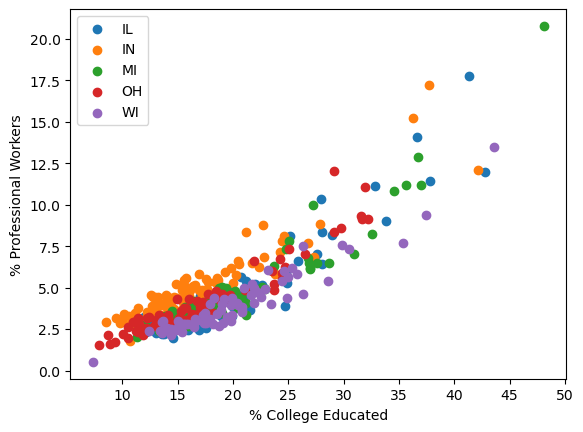

In [98]:
# Matplotlib
#   step 2: one scatter call per state, manual legend  😩

fig, ax = plt.subplots()
ax.scatter('percollege','percprof', data=IL, label='IL')
ax.scatter('percollege','percprof', data=IN, label='IN')
ax.scatter('percollege','percprof', data=MI, label='MI')
ax.scatter('percollege','percprof', data=OH, label='OH')
ax.scatter('percollege','percprof', data=WI, label='WI')
ax.set_xlabel('% College Educated')
ax.set_ylabel('% Professional Workers')
ax.legend()
plt.show()

> **That's ~12 lines just to add color!** And if there were 50 states? 😬

> With plotnine, the same result is **one line**. Let's see how.

---
## 3. Part 1 — Data + Aesthetics + Geometry

```python
(ggplot(data=df)                       # 1. data + aesthetics
 + aes(x='col1', y='col2'))            # 2. aesthetics
 + geom_point()                        # 3. geometry
).draw()                               # 4. render
```

| Piece | What it does |
|---|---|
| `ggplot(df, aes(...))` | Binds the data, declares which columns → which visual channels |
| `+ geom_point()` | Draw the marks as points (scatter) |
| `.draw()` | Render the figure — like `plt.show()` |

> **Tip:** Always wrap the whole expression in `( )` so you can chain `+` across multiple lines.

In [ ]:
# The same scatter — in ONE plotnine expression
(ggplot(df, aes(x='percollege', y='percprof'))
 + geom_point()
).draw()

'''
p = (ggplot(df, aes(x='percollege', y='percprof'))
 + geom_point()
)
p.draw()
'''

---
### Try It 1: Your First ggplot 😊

1. Make a scatter plot of `percollege` (x) vs `percbelowpoverty` (y).

2.  Make a scatter plot of `inmetro` (x) vs `percbelowpoverty` (y).
What are the levels of `inmetro`?

3. Add `alpha=0.4` inside `geom_point()` — what does transparency reveal about the data density?

4. Swap `geom_point()` for `geom_jitter()`. What changes? When might jitter be more useful than regular points?

In [ ]:
# 1. Scatter: percollege vs percbelowpoverty


In [ ]:
# 2. Scatter: inmetro vs percbelowpoverty


In [ ]:
# 3. Alpha: add alpha=0.4 inside geom_point()


In [ ]:
# 4. Jittered scatter: inmetro vs percbelowpoverty


#### (possible) Answer

In [ ]:
# 1.
p1_1 = (
    ggplot(df, aes(x='percollege', y='percbelowpoverty'))
    + geom_point()
)

p1_1.draw()

In [ ]:
# 2. geom_jitter adds a small random nudge — reduces overplotting
p1_2 = (
    ggplot(df, aes(x='inmetro', y='percbelowpoverty'))
    + geom_point()
)
p1_2.draw()

In [ ]:
# 3. Bonus: alpha controls transparency (0=invisible, 1=solid)
p1_3 = (
    ggplot(df, aes(x='inmetro', y='percbelowpoverty'))
    + geom_point(alpha=0.4)
)

p1_3.draw()

In [ ]:
# 4. Jittered scatter: inmetro vs percbelowpoverty
p1_4 = (
    ggplot(df, aes(x='inmetro', y='percbelowpoverty'))
    + geom_jitter(alpha=0.4)
)

p1_4.draw()

---
## 4. Part 2 — More Aesthetic Mappings

Map any column to any visual channel by adding it to `aes()`:

| `aes()` argument | Visual channel | Good for |
|---|---|---|
| `color=` | Point / line color | Categorical or continuous |
| `fill=` | Fill color | Bars, histograms, boxes |
| `size=` | Point size | Continuous values |
| `shape=` | Point shape | Categorical (few levels) |
| `alpha=` | Transparency | Overplotting / density |

plotnine **automatically** creates the legend — no manual work.

In [ ]:
# Map state → color  — plotnine handles subsetting & legend automatically
(
    ggplot(data=df)
    +aes(x='percollege', y='percprof', color='state')
    + geom_point()
).draw()

---
### Try me 2: Layer on More Variables

1. Map `state` to `color` **and** `percbelowpoverty` to `size`. Describe the pattern — which counties are large *and* poor?

2. Try mapping `inmetro` to `color` instead of `state`. `inmetro` is `1` for metro counties, `0` for rural. Does the college-to-professional relationship differ between metro and rural counties?

3. **Your choice:** pick any two numeric columns from `df` and make a scatter, colored by `state`. What's the most interesting relationship you find?

*Tip: useful columns — `perchsd`, `percadultpoverty`, `popdensity`, `percbelowpoverty`*

In [ ]:
# 1. color=state, size=percbelowpoverty


In [ ]:
# 2. color=inmetro (metro vs rural)
#   play around with wrapping inmetro with factor --> color='factor(inmetro)'
#      what does factor() do? factor() or no factor()?
#      which creates a more successful plot of the feature `inmetro`?


In [ ]:
# 3. Your own — any two columns, colored by state


<details>
<summary> Possible answers — click to peek</summary>
<br>

*Wrapping a numeric column in factor() forces plotnine to treat it as categorical — useful to have discrete values for features such as inmetro (0/1).*

```python
# 1.
(
    ggplot(data=df) 
    + aes(x='percollege', y='percprof', color='state', size='percbelowpoverty')
    + geom_point(alpha=0.6)
).draw()

# 2. inmetro needs to be a string for a discrete color scale
#   you can also keep the aes inside ggplot()
(ggplot(df, aes(x='percollege', y='percprof',
               color='factor(inmetro)'))
 + geom_point(alpha=0.6)
).draw()

# 3. Example — perchsd vs percbelowpoverty
(ggplot(df, aes(x='perchsd', y='percbelowpoverty', color='state'))
 + geom_point(alpha=0.5)
).draw()
```

</details>

---
## 5. Part 3 — Facets


Facets split your plot into a **grid of small multiples** — one panel per group value. No manual subsetting, no manual loop.

```python
+ facet_wrap('col')              # auto layout
+ facet_wrap('col', nrow=1)      # force 1 row
+ facet_wrap('col', ncol=2)      # force 2 columns
+ facet_grid(('row_col','col_col'))  # explicit grid
```

| Approach | Code | Auto labels? |
|---|---|---|
| Matplotlib subplots | lots of lines, need a loop | No |
| `facet_wrap('state')` | 1 extra line | Yessss |

**Matplotlib facets** — lots of code:

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3

# loop through the 
for i, (state, grp) in enumerate(df.groupby('state')):
    ax[i].scatter('percollege', 'percprof', data=grp, alpha=0.5)
    ax[i].set_title(state)
ax[0].set_xlabel('% College')
ax[0].set_ylabel('% Professional')
plt.tight_layout()
plt.show()

**plotnine facets** — one extra line:

In [ ]:
(ggplot(df, aes(x='percollege', y='percprof', color='state'))
 + geom_point(alpha=0.6)
 + facet_wrap('state', nrow=1)
 + theme(figure_size=(12, 3))
).draw()

---
### Try it 3: Facets

1. Facet the `percollege` vs `percprof` scatter by **`inmetro`** (metro vs rural). Is there a stronger relationship in one group?

2. Try `facet_grid(('inmetro', 'state'))` — rows = metro vs rural, columns = state. Set `figure_size` big enough to read. What does the grid tell you?

3. **Extra — free scales:** Add `scales='free'` inside `facet_wrap()`. What does it change? When is a free scale helpful vs misleading?

*Syntax: `facet_wrap('col', scales='free')`*

In [ ]:
# 1. facet by inmetro


In [ ]:
# 2. facet_grid(('inmetro','state'))


In [ ]:
# 3. Extra: scales='free'


<details>
<summary>Possible answers — click to peek</summary>
<br>

*Free scales let you see within-group patterns better, but make cross-panel comparisons harder — use carefully!*

```python
# 1.
(ggplot(df, aes(x='percollege', y='percprof', color='factor(inmetro)'))
 + geom_point(alpha=0.6)
 + facet_wrap('inmetro')
).draw()

# 2.
(ggplot(df, aes(x='percollege', y='percprof', color='state'))
 + geom_point(alpha=0.5)
 + facet_grid(('inmetro', 'state'))
 + theme(figure_size=(12, 6))
).draw()

# 3. Bonus — free scales let each panel use its own axis range
(ggplot(df, aes(x='percollege', y='percprof', color='state'))
 + geom_point(alpha=0.6)
 + facet_wrap('state', scales='free')
).draw()
```

</details>

---
## 6. Part 4 — Geometric Objects

Swap the `geom_*` to change the plot type — everything else stays the same.

| `geom_*` | Use for... | Key arguments |
|---|---|---|
| `geom_point()` | Scatter — two continuous vars | `alpha`, `size` |
| `geom_jitter()` | Scatter with anti-overlap nudge | `width`, `height` |
| `geom_line()` | Trends over ordered data | |
| `geom_bar()` | **Auto-counts** rows per category | |
| `geom_col()` | Bars from pre-computed values | |
| `geom_histogram()` | Distribution of one continuous var | `bins=` |
| `geom_boxplot()` | Distribution summary per group | |
| `geom_violin()` | Like boxplot but shows full distribution shape | |

In [ ]:
# geom_bar() counts rows automatically — no value_counts() needed
(ggplot(df, aes(x='state'))
 + geom_bar()
).draw()

In [ ]:
# geom_histogram() — distribution of a continuous variable
(ggplot(df, aes(x='percollege'))
 + geom_histogram(bins=20)
).draw()

---
### Try me 4: Swap the Geom

1. Make a **histogram** of `percbelowpoverty`. Try `bins=10`, then `bins=40`. How does the number of bins change what the plot communicates?

2. Make a **boxplot** of `percollege` split by `state`. Map `state` to `fill`. Which state has the widest spread? The highest median?

3. Swap `geom_boxplot()` for `geom_violin()`. What additional information does the violin show that a boxplot hides?

4. **Your choice:** make any plot type from the table above using `df`. Pick something you haven't tried yet.

In [ ]:
# 1. Histogram of percbelowpoverty — try different bins


In [ ]:
# 2. Boxplot: percollege split by state
#    percollege (y) by state (x), fill=state


In [ ]:
# 3. Same but with geom_violin()


In [ ]:
# 4. Your choice — any geom, any columns


<details>
<summary>Possible answers — click to peek</summary>
<br>

*Violin plots show the full distribution shape (bimodal, skewed, etc.) — boxplots only show the 5-number summary.*

```python
# 1.
(ggplot(df, aes(x='percbelowpoverty'))
 + geom_histogram(bins=10)
).draw()
(ggplot(df, aes(x='percbelowpoverty'))
 + geom_histogram(bins=40)
).draw()

# 2.
(ggplot(df, aes(x='state', y='percollege', fill='state'))
 + geom_boxplot()
).draw()

# 3.
(ggplot(df, aes(x='state', y='percollege', fill='state'))
 + geom_violin()
).draw()

# 4. Example — bar chart of metro vs rural counties
(ggplot(df, aes(x='factor(inmetro)'))
 + geom_bar(fill='steelblue')
).draw()
```

</details>

---
## 7. Part 5 — Statistical Transformations

`stat_*` layers compute summaries **from the raw data** and overlay them — no pre-processing needed.

| Function | What it computes |
|---|---|
| `stat_smooth()` | Smoothing line + confidence band (LOESS by default) |
| `stat_smooth(method='lm')` | Linear regression line |
| `stat_bin(bins=n)` | Bin counts for a continuous variable |
| `stat_count()` | Row counts per category (default for `geom_bar`) |

In [ ]:
# stat_smooth adds a smoothing line + shaded confidence band
(ggplot(df, aes(x='percollege', y='percprof', color='state'))
 + geom_point(alpha=0.5)
 + facet_wrap('state', nrow=1)
 + stat_smooth()
 + theme(figure_size=(12, 3))
).draw()

---
### Try it 5: Add a Stat Layer

1. Take your scatter of `percollege` vs `percbelowpoverty` and add `stat_smooth()`. Does the relationship look linear or curved?

2. Try `stat_smooth(method='lm')` — this forces a **linear** fit. Does a straight line seem like a fair representation?

3. **Challenge:** add `stat_smooth()` to a scatter that's faceted by state. Do some states show a stronger trend than others?

In [ ]:
# 1. percollege vs percbelowpoverty + stat_smooth()


In [ ]:
# 2. Same but method='lm' (linear fit)


In [ ]:
# 3. Faceted scatter + stat_smooth per state



<details>
<summary>POssible answer — click to peek</summary>
<br>

```python
# 1.
(ggplot(df, aes(x='percollege', y='percbelowpoverty'))
 + geom_point(alpha=0.4)
 + stat_smooth()
).draw()

# 2.
(ggplot(df, aes(x='percollege', y='percbelowpoverty'))
 + geom_point(alpha=0.4)
 + stat_smooth(method='lm')
).draw()

# 3.
(ggplot(df, aes(x='percollege', y='percbelowpoverty', color='state'))
 + geom_point(alpha=0.5)
 + facet_wrap('state', nrow=1)
 + stat_smooth(method='lm')
 + theme(figure_size=(12, 3))
).draw()
```

</details>

---
## Fun with Diamonds dataset

The `diamonds` dataset has ~54,000 diamonds. Use everything you've learned today.

| Column | Description |
|---|---|
| `price` | Price in USD |
| `carat` | Weight of the diamond |
| `cut` | Quality: Fair < Good < Very Good < Premium < Ideal |
| `color` | Color grade: D (best) → J (worst) |
| `clarity` | Clarity: I1 (worst) → IF (best) |
| `depth`, `table` | Physical proportions |

In [ ]:
from plotnine.data import diamonds
diamonds.head(3)

**Prompt 1 — Distributions:**

Make a histogram of `price`. Then facet it by `cut`. Does cut quality affect the price distribution?

In [ ]:
# Prompt 1


<details>
<summary>💡 One approach — click to peek</summary>
<br>

```python
(ggplot(diamonds, aes(x='price'))
 + geom_histogram(bins=40)
).draw()

(ggplot(diamonds, aes(x='price', fill='cut'))
 + geom_histogram(bins=30)
 + facet_wrap('cut')
).draw()
```

</details>

**Prompt 2 — Relationships:**

Plot `carat` (x) vs `price` (y). Map `cut` to `color`. Add a smoothing line. Is the relationship linear? Does it differ by cut?

In [ ]:
# Prompt 2


<details>
<summary>Possible answer — click to peek</summary>
<br>

```python
(ggplot(diamonds, aes(x='carat', y='price', color='cut'))
 + geom_point(alpha=0.2)
 + stat_smooth()
).draw()
```

</details>

**Prompt 3 — WiLdCaRd:**

Make a plot that answers a question *you* find interesting about diamonds. Requirements:
- At least **2 aesthetic mappings**
- At least **2 layers** (e.g., geom + stat, or geom + facet)

Write one sentence below interpreting your plot.

In [ ]:
# Prompt 3 — your choice


*Your interpretation: (double-click to edit)*

<details>
<summary>💡 One approach — click to peek</summary>
<br>

```python
# One example — many right answers!
(ggplot(diamonds, aes(x='carat', y='price', color='cut'))
 + geom_point(alpha=0.15)
 + stat_smooth(method='lm', se=False)
 + facet_wrap('clarity')
 + theme(figure_size=(12, 8))
).draw()
# Story: within each clarity grade, carat strongly predicts price,
# but IF (flawless) diamonds command a steeper premium per carat.
```

</details>

---
## Appendix — `plotnine` Quick Reference

### Minimal template
```python
(ggplot(df, aes(x='col1', y='col2'))  # data + aesthetics
 + geom_point()                        # geometry
).draw()                               # render
```

### Full template
```python
(ggplot(df, aes(x='col1', y='col2', color='category'))
 + geom_point(alpha=0.5)     # geometry
 + facet_wrap('category')        # facets
 + stat_smooth()             # stats
 + scale_color_cmap_d()      # scales
 + theme(figure_size=(8,4))  # theme
).draw()
```

### Additional line styles, colors, marks
[Aesthetic guide](https://plotnine.org/guide/aesthetic-specification.html)